In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.tree import plot_tree

In [4]:
loan = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\Loan Approval.csv')  
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


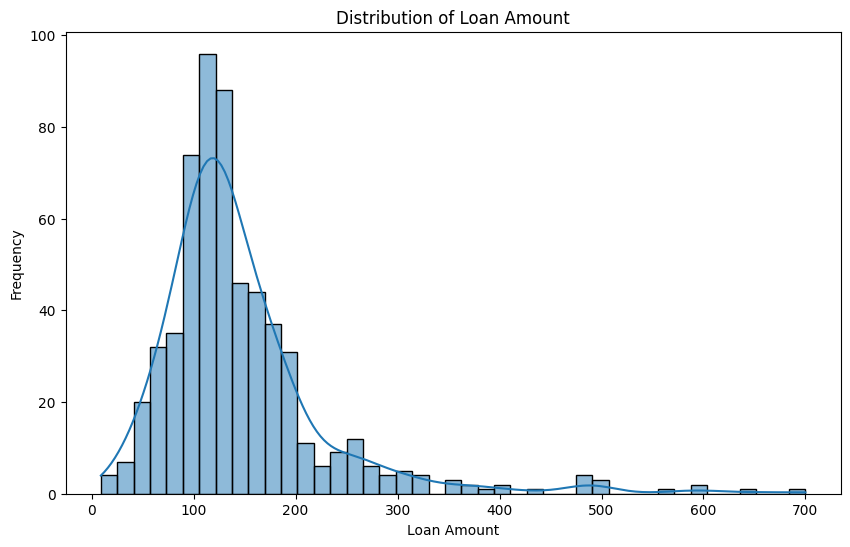

In [15]:
# Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(loan['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

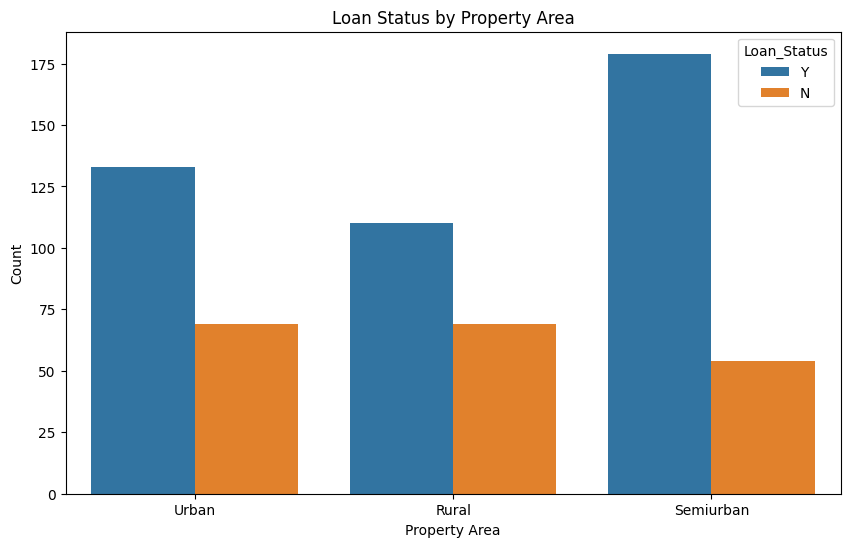

In [16]:
# Loan Status by Property Area
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

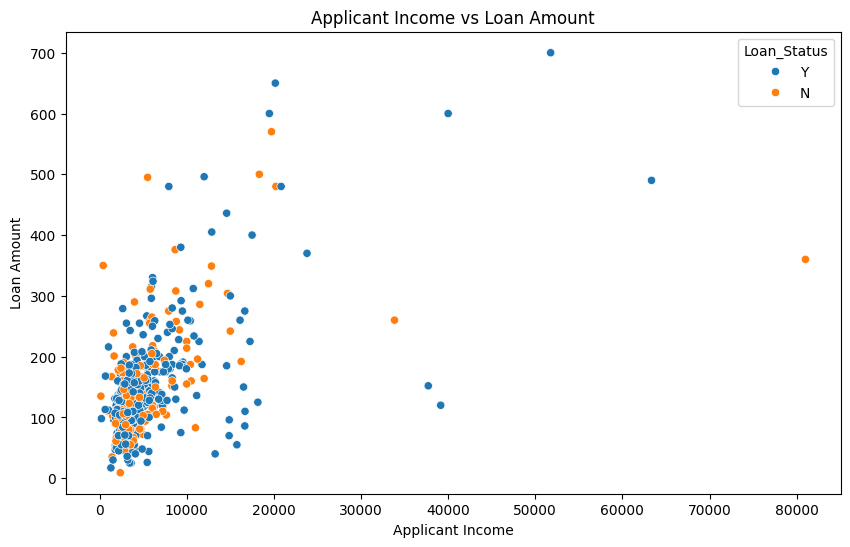

In [18]:
# Applicant Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [7]:
X = loan[['ApplicantIncome']]
y = loan['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.38      0.30      0.34        43
           Y       0.66      0.74      0.70        80

    accuracy                           0.59       123
   macro avg       0.52      0.52      0.52       123
weighted avg       0.56      0.59      0.57       123



In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Y')
recall = recall_score(y_test, y_pred, pos_label='Y')
f1 = f1_score(y_test, y_pred, pos_label='Y')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.59
Precision: 0.66
Recall: 0.74
F1-score: 0.70


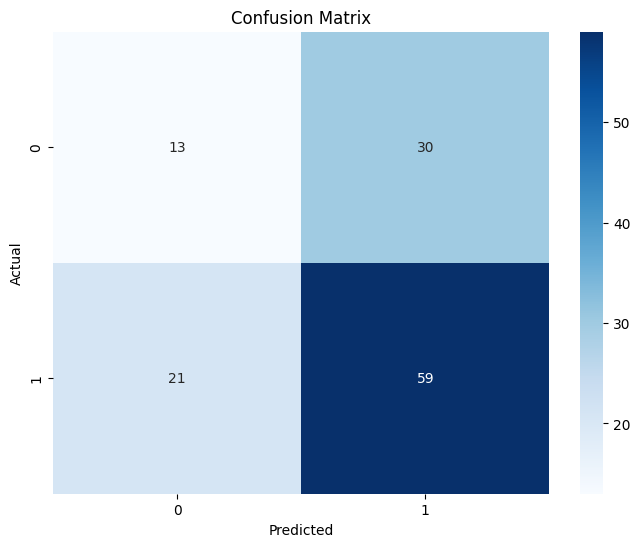

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

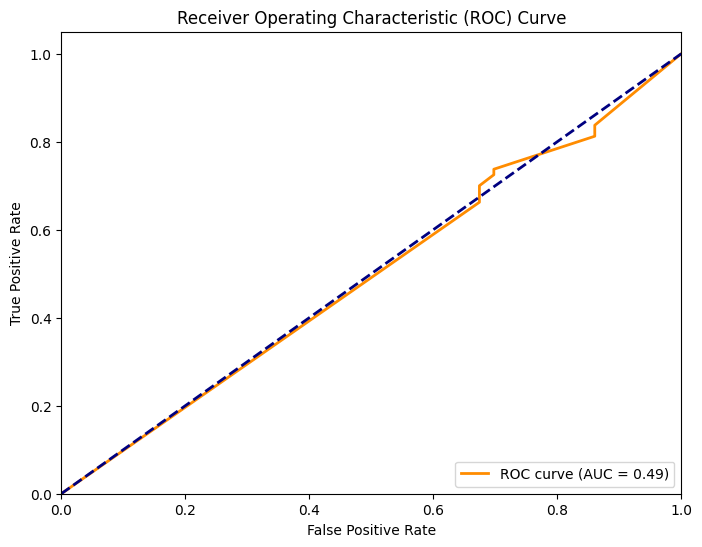

In [23]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='Y')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

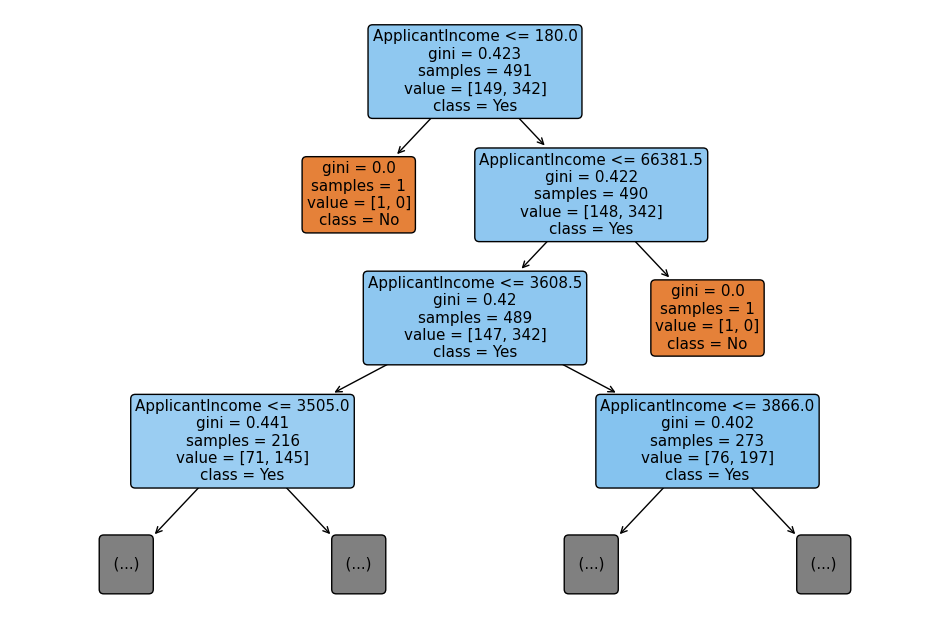

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['ApplicantIncome'], class_names=['No', 'Yes'], rounded=True,max_depth=3)
plt.show()